In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string as str

load the data

In [3]:
df = pd.read_csv("C:\\Users\\codew\\Downloads\\netflix_titles_nov_2019.csv.zip")

In [4]:
df.head(5)

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type
0,81193313,Chocolate,NaN,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,"November 30, 2019",2019,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",Brought together by meaningful meals in the pa...,TV Show
1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,NaN,"November 30, 2019",2019,TV-G,67 min,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie
2,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,"November 30, 2019",2019,TV-14,135 min,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie
3,81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium","November 29, 2019",2019,TV-14,106 min,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru...",Movie
4,80213643,Chip and Potato,NaN,"Abigail Oliver, Andrea Libman, Briana Buckmast...","Canada, United Kingdom",NaN,2019,TV-Y,2 Seasons,Kids' TV,"Lovable pug Chip starts kindergarten, makes ne...",TV Show


In [5]:
df.shape

(5837, 12)

In [6]:
df.columns

Index(['show_id', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'type'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5837 entries, 0 to 5836
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       5837 non-null   int64 
 1   title         5837 non-null   object
 2   director      3936 non-null   object
 3   cast          5281 non-null   object
 4   country       5410 non-null   object
 5   date_added    5195 non-null   object
 6   release_year  5837 non-null   int64 
 7   rating        5827 non-null   object
 8   duration      5837 non-null   object
 9   listed_in     5837 non-null   object
 10  description   5837 non-null   object
 11  type          5837 non-null   object
dtypes: int64(2), object(10)
memory usage: 547.3+ KB


# data cleaning

Treating Missing value

In [8]:
df.isnull().sum()

show_id            0
title              0
director        1901
cast             556
country          427
date_added       642
release_year       0
rating            10
duration           0
listed_in          0
description        0
type               0
dtype: int64

In [9]:
df['director'].fillna('not Available' , inplace = True )
df['cast'].fillna('not Available' , inplace = True )
df['country'].fillna('unknown' , inplace = True )
df['date_added'].fillna('unknown' , inplace = True )
df['rating'].fillna('unknown' , inplace = True )



check if there any duplicate values

In [10]:
df.duplicated().sum()

0

change data type of date_added

In [11]:
df['date_added'] = pd.to_datetime(df['date_added'],errors = 'coerce')

In [12]:
df.columns = df.columns.str.strip()
df['type'] = (df['type'].str.strip().str.lower())

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5837 entries, 0 to 5836
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       5837 non-null   int64         
 1   title         5837 non-null   object        
 2   director      5837 non-null   object        
 3   cast          5837 non-null   object        
 4   country       5837 non-null   object        
 5   date_added    5195 non-null   datetime64[ns]
 6   release_year  5837 non-null   int64         
 7   rating        5837 non-null   object        
 8   duration      5837 non-null   object        
 9   listed_in     5837 non-null   object        
 10  description   5837 non-null   object        
 11  type          5837 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 547.3+ KB


In [14]:
df["date_added"] = pd.to_datetime(df['date_added'])
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

# EDA

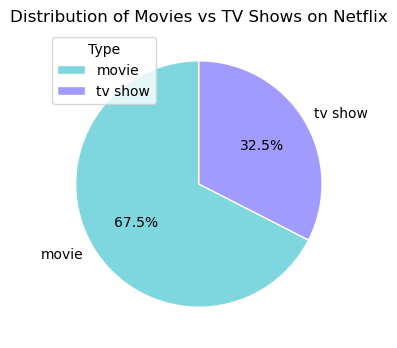

In [15]:


# Count each type
type_counts = df['type'].value_counts()

# Pie chart
plt.figure(figsize=(4,4))
plt.pie(type_counts, 
        labels=type_counts.index, 
        autopct='%1.1f%%', 
        startangle=90,
        colors=['#7ed6df', '#a29bfe'],  # optional: custom pastel colors
        wedgeprops={'edgecolor': 'white'})  # separates wedges

# Add legend
plt.legend(title='Type', loc='upper left')

# Add a title (optional)
plt.title("Distribution of Movies vs TV Shows on Netflix")

# Show the chart
plt.show()

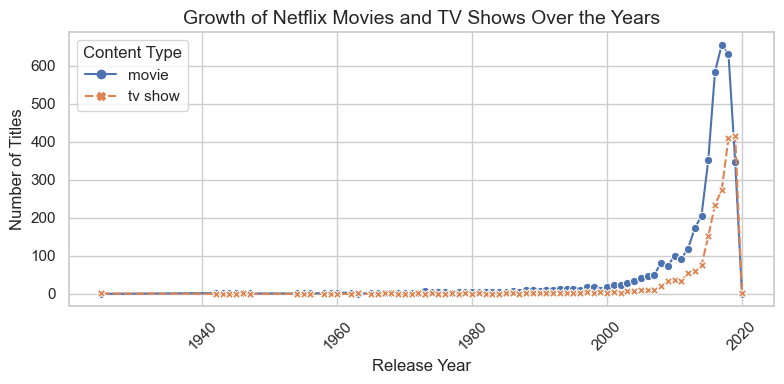

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Group by release year and type
content_by_year_type = df.groupby(['release_year', 'type']).size().reset_index(name='count')

# Pivot the DataFrame for separate lines
pivot_df = content_by_year_type.pivot(index='release_year', columns='type', values='count').fillna(0)

# Plot
plt.figure(figsize=(8,4))
sns.lineplot(data=pivot_df, markers=True)

# Labels and title
plt.title('Growth of Netflix Movies and TV Shows Over the Years', fontsize=14)
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.legend(title='Content Type')

# Show plot
plt.tight_layout()
plt.show()

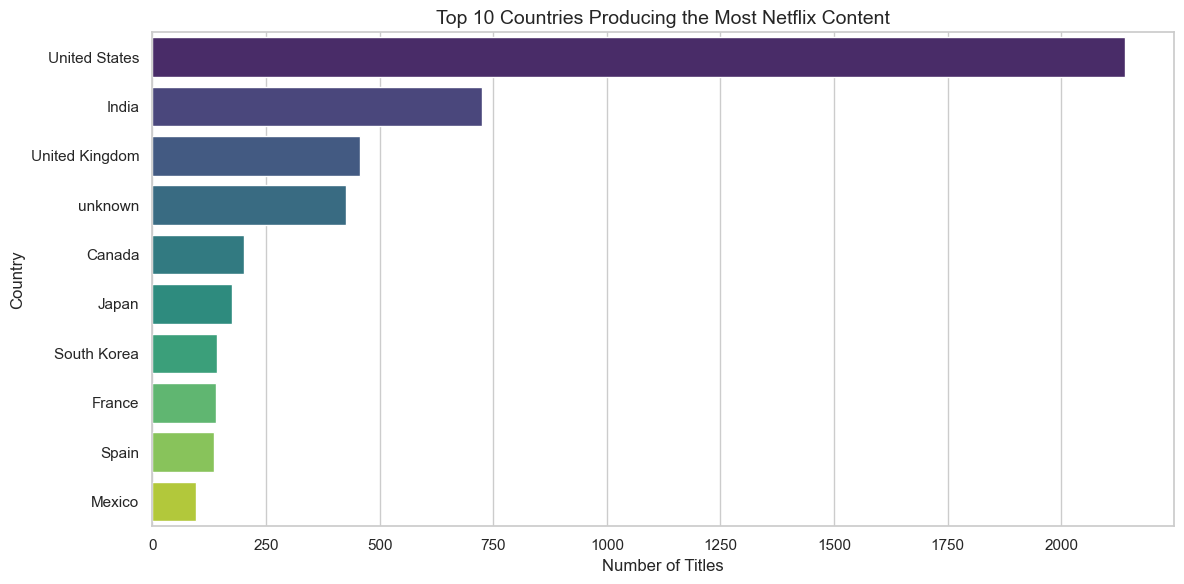

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Split multiple countries in a single cell and explode them
df_country = df.copy()
df_country['country'] = df_country['country'].fillna('Unknown')
df_country['country'] = df_country['country'].apply(lambda x: x.split(',')[0].strip())

# Count number of contents per country
country_counts = df_country['country'].value_counts().head(10)  # Top 10 countries

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=country_counts.values, y=country_counts.index, palette='viridis')

# Titles and labels
plt.title('Top 10 Countries Producing the Most Netflix Content', fontsize=14)
plt.xlabel('Number of Titles')
plt.ylabel('Country')

# Show plot
plt.tight_layout()
plt.show()

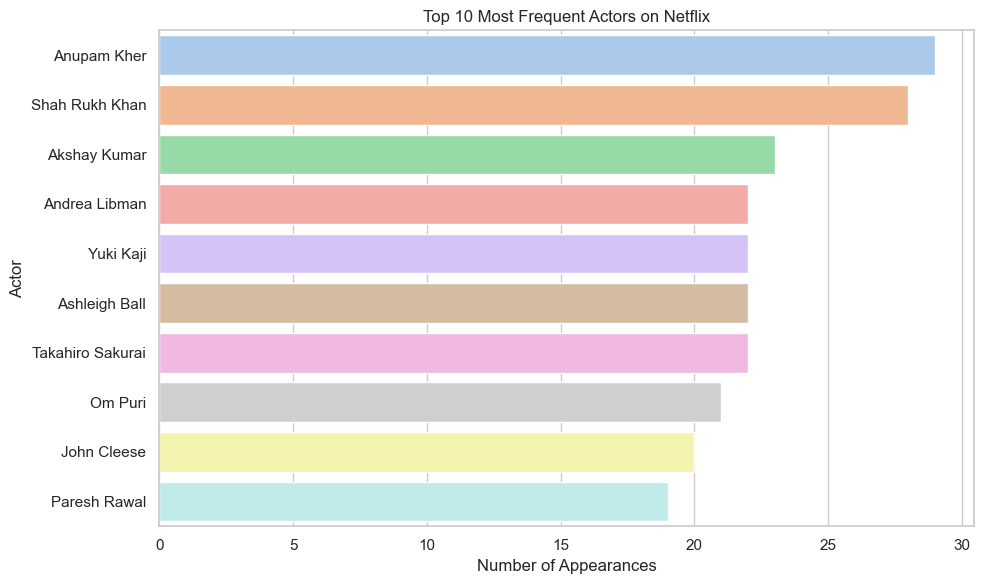

In [18]:
# Remove 'Not Available' before analysis
filtered_actors = df[df['cast'] != 'not Available']

# Split cast by comma and explode into separate rows
actors = filtered_actors['cast'].str.split(',').explode().str.strip()

# Count frequency of each actor
top_actors = actors.value_counts().head(10)

# Plot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(x=top_actors.values, y=top_actors.index, palette='pastel')
plt.title('Top 10 Most Frequent Actors on Netflix')
plt.xlabel('Number of Appearances')
plt.ylabel('Actor')
plt.tight_layout()
plt.show()

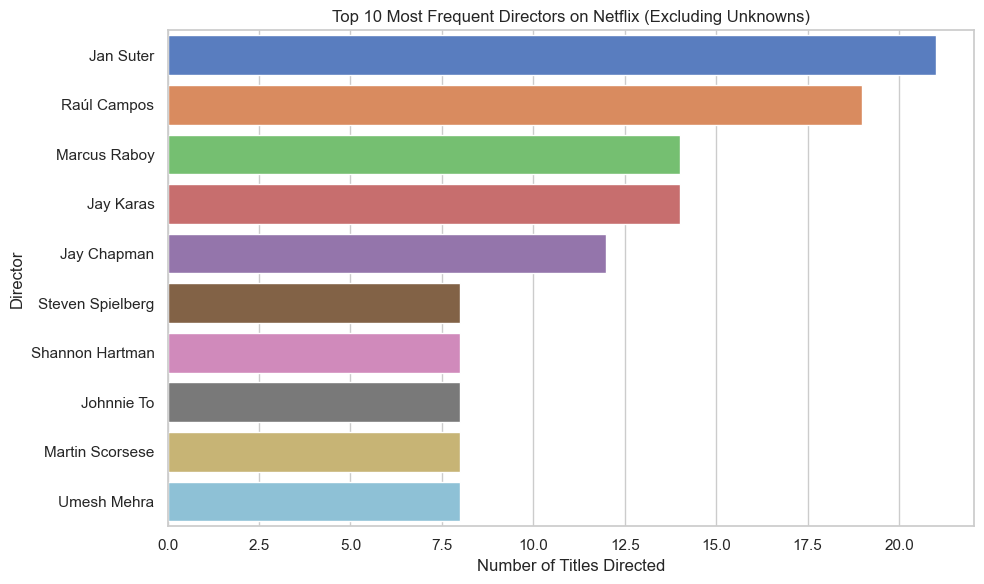

In [19]:


# Remove 'Not Available' before analysis
filtered_directors = df[df['director'] != 'not Available']

# Split multiple directors and clean
directors = filtered_directors['director'].str.split(',').explode().str.strip()

# Count top 10 directors
top_directors = directors.value_counts().head(10)

# Plot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(x=top_directors.values, y=top_directors.index, palette='muted')
plt.title('Top 10 Most Frequent Directors on Netflix (Excluding Unknowns)')
plt.xlabel('Number of Titles Directed')
plt.ylabel('Director')
plt.tight_layout()
plt.show()

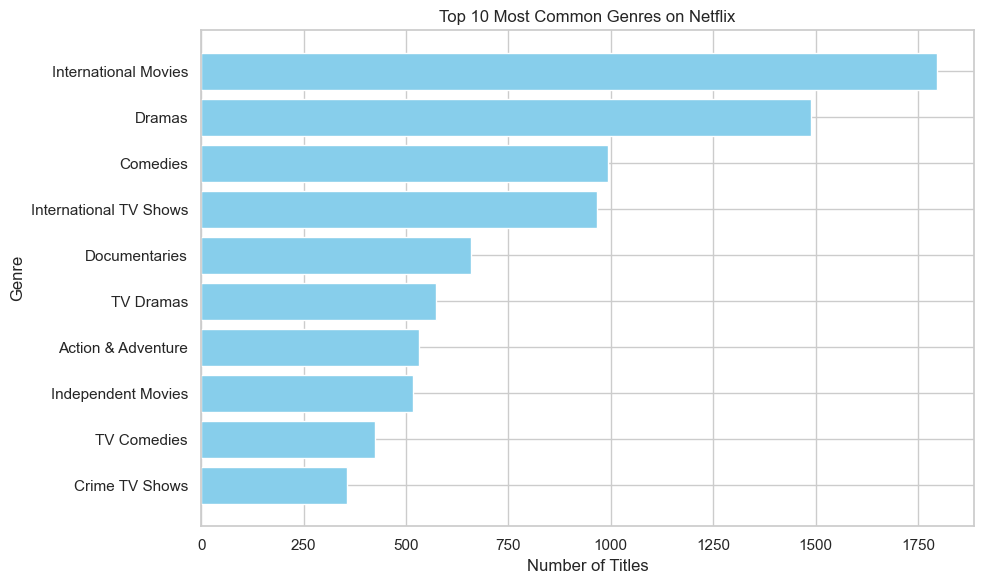

In [20]:
from collections import Counter
import matplotlib.pyplot as plt

# Step 1: Drop missing values in 'listed_in'
genre_series = df['listed_in'].dropna()

# Step 2: Split genres by comma and flatten the list
all_genres = [genre.strip() for sublist in genre_series.str.split(',') for genre in sublist]

# Step 3: Count genre frequency
genre_counts = Counter(all_genres)

# Step 4: Get top 10 most common genres
top_genres = genre_counts.most_common(10)

# Convert to DataFrame for plotting
genre_df = pd.DataFrame(top_genres, columns=['Genre', 'Count'])

# Step 5: Plot
plt.figure(figsize=(10,6))
plt.barh(genre_df['Genre'][::-1], genre_df['Count'][::-1], color='skyblue')
plt.title('Top 10 Most Common Genres on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()